<a href="https://colab.research.google.com/github/shrad1997/Kmeans_clustering/blob/main/Kmeans_crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


In [89]:
df=pd.read_csv("/content/crime_data.csv")

In [90]:
df.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [91]:
df.rename(columns = {'Unnamed: 0':'US_State'},inplace=True)

In [92]:
df.head(5)

,US_State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   US_State  50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [94]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [95]:
df_norm = norm_func(df.iloc[:,1:])

In [96]:
df_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


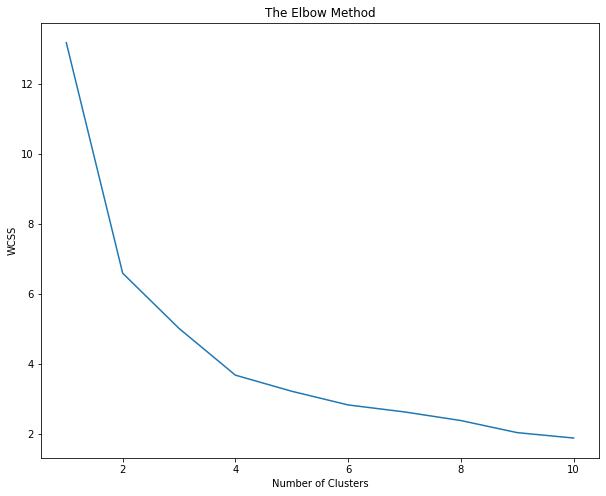

In [97]:
#Elbow method
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS(average)
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [98]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(df_norm)

In [99]:
y_kmeans
#clf.cluster_centers_
clf.labels_


array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3], dtype=int32)

In [100]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
df['cluster_number']=md # creating a  new column and assigning it to new column 
df.head(5)

,US_State,Murder,Assault,UrbanPop,Rape,cluster_number
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [101]:
df.iloc[:,1:5].groupby(df.cluster_number).mean()

,Murder,Assault,UrbanPop,Rape
cluster_number,,,,
0,10.966667,264.000000,76.500000,33.608333
1,3.600000,78.538462,52.076923,12.176923
2,13.937500,243.625000,53.750000,21.412500
3,5.852941,141.176471,73.647059,19.335294


Text(0.5, 1.0, 'Clusters using KMeans')

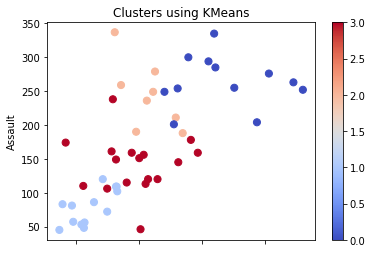

In [102]:
df.plot(x="Rape",y ="Assault",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [103]:
clf.inertia_

3.6834561535859143

In [104]:
WCSS

[13.184122550256445,
 6.596893867946198,
 5.019054546630203,
 3.6834561535859143,
 3.223208055249011,
 2.832298575033044,
 2.6330675873593195,
 2.386427212759915,
 2.041240986072492,
 1.8868593980999946]